In [1]:
import numpy as np
from matplotlib import pyplot as pl

In [2]:
def kernel_f(x, xl, sigma, l):
    return sigma**2*np.exp(-.5 * (1/l**2) * (x-xl)**2)

In [3]:
def K(X, Xl, sigma, l):
    n, m = X.shape[0], Xl.shape[0]
    K = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            K[i,j] = kernel_f(X[i], Xl[j], sigma, l)
    return K    

In [4]:
def gaussian_fit_vec(X, X_new, Y, cov, l):
    KXX = K(X, X, 1, 1)
    KXnX = K(X_new, X, 1, 1)
    KXXn = K(X, X_new, 1, 1)
    KXnXn = K(X_new, X_new, 1, 1)
    
    aux = KXnX.dot(np.linalg.inv(KXX+np.multiply(1**2, np.identity(KXX.shape[0]))))

    mean = aux.dot(Y)
    print(aux.dot(KXXn))
    print(cov**2*np.identity(KXnXn.shape[0]))
    covariance = KXnXn + cov**2*np.identity(KXnXn.shape[0]) - aux.dot(KXXn)

    return(mean, covariance)

In [5]:
X = np.linspace(-5, 5, 9)
Y = np.sin(X)+np.random.normal(loc = 0, scale = 0.001, size = 9)
n = 1000
Xn = np.linspace(-5, 5, n)

In [6]:
mu, cov = gaussian_fit_vec(X, Xn, Y,1,1)

[[ 5.28199228e-01  5.28873188e-01  5.29502594e-01 ... -4.83386258e-08
  -4.95883732e-08 -5.07639722e-08]
 [ 5.28873188e-01  5.29564645e-01  5.30211695e-01 ... -4.70344297e-08
  -4.83490968e-08 -4.95883732e-08]
 [ 5.29502594e-01  5.30211695e-01  5.30876541e-01 ... -4.56536124e-08
  -4.70344297e-08 -4.83386258e-08]
 ...
 [-4.83386258e-08 -4.70344297e-08 -4.56536124e-08 ...  5.30876541e-01
   5.30211695e-01  5.29502594e-01]
 [-4.95883732e-08 -4.83490968e-08 -4.70344297e-08 ...  5.30211695e-01
   5.29564645e-01  5.28873188e-01]
 [-5.07639722e-08 -4.95883732e-08 -4.83386258e-08 ...  5.29502594e-01
   5.28873188e-01  5.28199228e-01]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
stdv = np.sqrt(np.diag(cov))

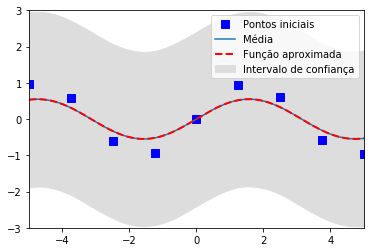

In [8]:
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, mu, label="Média")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Função aproximada")
pl.axis([-5, 5, -3, 3])
#pl.title('Three samples from the GP posterior')
pl.legend()
pl.show()